In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as ss

competencia_df = pd.read_csv('/media/eze/Data/Documents/Facultad/00_doc/Mutantes/7dpiAlfL.csv')
competencia_df['afectado'] = np.where((competencia_df['7dpiAlfL_KValor M']<-0.7) & (competencia_df['7dpiAlfL_HValor M']<-0.7) & (competencia_df['7dpiAlfL_Kt-test']<0.1) & (competencia_df['7dpiAlfL_Ht-test']<0.1), 'negativo', 'no_negativo')
print(competencia_df[(competencia_df['contig']=='pSymA') & (competencia_df['afectado']=='negativo')])

                 mutant_ID  pool  firma  7dpiAlfL_KSUMA  7dpiAlfL_KValor M  \
913   2011mTn5STM.1.10.H02  10.0   86.0          286.00              -0.81   
3760  2011mTn5STM.3.11.B02  11.0  470.0          166.75              -0.90   
5278  2011mTn5STM.4.12.C04  12.0  316.0          473.50              -0.99   

      7dpiAlfL_Kt-test  7dpiAlfL_HSUMA  7dpiAlfL_HValor M  7dpiAlfL_Ht-test  \
913           0.007157          514.00              -0.75          0.070000   
3760          0.010000          143.75              -0.87          0.003726   
5278          0.000208          521.25              -1.15          0.000545   

       position            region contig Locus_tag         Gene  \
913   1173803.0     AE006469_1134  pSymA   SMa2077      SMa2077   
3760  1263021.0  ]--Intergenic--[  pSymA        --   Intergenic   
5278   806816.0      AE006469_799  pSymA   SMa1465      SMa1465   

                       Protein  afectado  
913             oxidoreductase  negativo  
3760           

In [46]:
#M<-0,7 y un p < 0,1, tanto en la firma K como en la firma H

# filtrados_df = afectados_df[(afectados_df['7dpiAlfL_KValor M']<-0.7) & (afectados_df['7dpiAlfL_HValor M']<-0.7) & (afectados_df['7dpiAlfL_Kt-test']<0.1) & (afectados_df['7dpiAlfL_Ht-test']<0.1)]
# print(filtrados_df.shape)

print(competencia_df.groupby('contig').count())


            mutant_ID  pool  firma  7dpiAlfL_KSUMA  7dpiAlfL_KValor M  \
contig                                                                  
chromosome       2530  2530   2530            2530               2530   
pSymA            1007  1007   1007            1007               1007   
pSymB            1422  1422   1422            1422               1422   

            7dpiAlfL_Kt-test  7dpiAlfL_HSUMA  7dpiAlfL_HValor M  \
contig                                                            
chromosome              2530            2530               2530   
pSymA                   1007            1007               1007   
pSymB                   1422            1422               1422   

            7dpiAlfL_Ht-test  position  region  Locus_tag  Gene  Protein  \
contig                                                                     
chromosome              2530      2530    2530       2530  2514     2514   
pSymA                   1007      1007    1007        996   996      9

chromosome    2530
pSymB         1422
pSymA         1007
Name: contig, dtype: int64


/home/eze/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


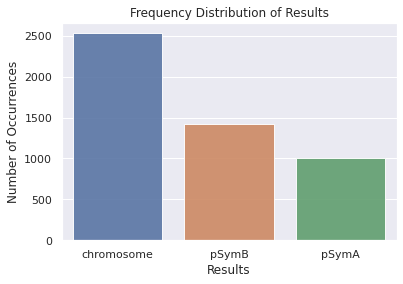

In [47]:
contig_count = competencia_df['contig'].value_counts()
print(contig_count)
#definimos el estilo de gráfico
sns.set(style="darkgrid")
sns.barplot(contig_count.index, contig_count.values, alpha=0.9)
#titulo
plt.title('Frequency Distribution of Results')
#Nombres de los ejes
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Results', fontsize=12)

plt.show()

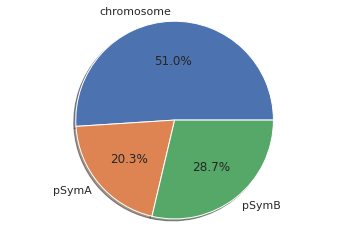

In [48]:
labels = competencia_df['contig'].astype('category').cat.categories.tolist()
counts = competencia_df['contig'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [52]:
df2 = competencia_df['contig'] + competencia_df['afectado']

a = competencia_df['contig'] == 'chromosome'
b = competencia_df['afectado'] == 'negativo'

#comparamos los datos en una tabla de contingencia
groups = df2.groupby([a,b]).count() 
print (groups)
print(ss.chisquare(groups, ddof=0, axis=0))

contig  afectado
False   False       2407
        True          22
True    False       2380
        True         150
dtype: int64
Power_divergenceResult(statistic=4301.76467029643, pvalue=0.0)
